In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy.linalg as LA
import pandas as pd

In [2]:
import Function as f

In [3]:
# np.random.seed(0)

Setting the Hyper-Parameter:

In [4]:
max_iteration = 15000
weight_decay = 1e-5
Epsilons = [10,10]
BANDWIDTH = 0.5

In [5]:
filename = "200(180+20).csv"
(X, X_train, X_val), (Y, Y_train, Y_val), (survival_times)= f.read_files(filename)
NUM_TRAIN = X_train.shape[0]
NUM_VAL = X_val.shape[0]
NUM_EMPLOYEES = X.shape[0]

[ 27.  10.  58. 129.  19.   7.  58.  52.  31.  80.  31.  57.  40.  35.
  29.   8.  36.   1.  39.  13.  28.  15. 143.  42.  40.   5.   8.  30.
  99.  27.  28.   9.   8.  26.  43.  49.   1.  10.  37.  33.  30.  17.
 137. 106.  30.   1.  15.  72.  14.  48.   2. 106.  48.  31. 167.   3.
  67.   8.   1.  43. 134.  43.   3.   7.  45.   3.  31.  10.  10.  43.
  80.  23.   1.  85.  12.   3.  10.   8.   5.  14.  29.  28.  16.   2.
  27.   2.  86.   7.   5.  84.   1.  18.  74.   6. 127.  69. 109.   4.
  68.   1.  30.   9.  47.   5.  80.  50. 117.  20.  15.  33.   2.  25.
  19.  25.   5.  83.  20. 111.  49.  16.   9.   6.  12.  52.   7.   5.
  46.  29.   2.  35.   6.  52.  24.   7.  87. 108.  46.   7.  23.  17.
   1.  11.  33.   1.  61. 110.   3. 117.  19.  37.   6.  11.  40.  82.
  89.   7. 160. 118.  20.  10.  86.  99.  10.   4.  32.  23.  47.  13.
  64.  64.  17. 130.   1.  73.  48.  28.   8.  73.   1.  53.  24.   9.
   7.  58.  10.   8.  11.   7.  73.  23.   2.  30.  36.  28.  11.   4.
  22. 

In [6]:
# Kernel_Matrix = f.Generating_Kernel(X, "Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix = f.Generating_Kernel(X, "Quick_Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix_Train = Kernel_Matrix[:NUM_TRAIN,:NUM_TRAIN]
Kernel_Matrix_Val = Kernel_Matrix[NUM_TRAIN:,:NUM_TRAIN]

There are  39292 pairs of samples of similarity between 0.0 and 0.1 which have an average age_gap  39.30479486918457 and the median is: 28.0
There are  290 pairs of samples of similarity between 0.1 and 0.2 which have an average age_gap  30.572413793103447 and the median is: 18.0
There are  122 pairs of samples of similarity between 0.2 and 0.3 which have an average age_gap  26.442622950819672 and the median is: 16.0
There are  46 pairs of samples of similarity between 0.3 and 0.4 which have an average age_gap  20.695652173913043 and the median is: 16.0
There are  14 pairs of samples of similarity between 0.4 and 0.5 which have an average age_gap  28.857142857142858 and the median is: 18.0
There are  20 pairs of samples of similarity between 0.5 and 0.6 which have an average age_gap  19.0 and the median is: 5.5
There are  6 pairs of samples of similarity between 0.6 and 0.7 which have an average age_gap  5.333333333333333 and the median is: 5.0
There are  8 pairs of samples of similari

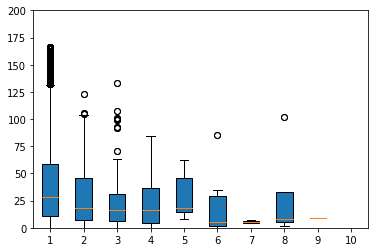

In [8]:
f.Validate_Synthetic_DataSet(Kernel_Matrix, survival_times)

Have a quick look at the distribution of ages:

Text(0, 0.5, 'survival time')

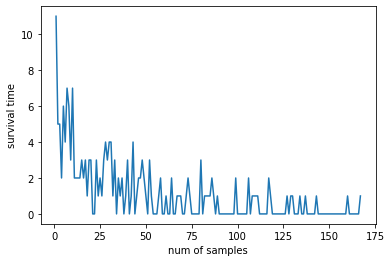

In [11]:
NUM_TASKS = Y.shape[1]
x_axis = np.arange(NUM_TASKS)+1
y_train_gt_axis = np.zeros(NUM_TASKS)
for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
plt.plot(x_axis, y_train_gt_axis)
plt.xlabel("num of samples")
plt.ylabel("survival time")

In [12]:
print(np.mean(survival_times))
print(np.std(survival_times))

37.63
37.127928840698885


In [22]:
alpha = np.zeros_like(Y_train) 
# alpha = np.ones_like(Y_train) 
predict_age = np.zeros(NUM_EMPLOYEES) 
val_loss_list = []
index = 0
for t in range(1, max_iteration+1):

    alpha = f.Kernel_Pegasos(180, Kernel_Matrix_Train, alpha, Y_train, t, weight_decay)
    # alpha = f.Split_Kernel_Pegasos(1, Kernel_Matrix_Train, alpha, Y_train, t, weight_decay) 
    
    if t%1000 == 0 or t == 1: 
        print("the iteration is:", t)
        hatY_train = Kernel_Matrix_Train.dot(alpha*Y_train) / ( t * weight_decay )
        
        hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) / ( t * weight_decay )
        
        # predict_age_tr = f.Ages(hatY_train)
        # predict_age_val = f.Ages(hatY_val)
        predict_age_tr = f.Weighted_Ages(hatY_train)
        predict_age_val = f.Weighted_Ages(hatY_val)
        predict_age = predict_age_tr + predict_age_val
            
        acc_train = np.sum(Y_train * hatY_train > 0) / (NUM_TRAIN * NUM_TASKS)
        acc_val = np.sum(Y_val * hatY_val > 0) / (NUM_VAL * NUM_TASKS)
        print("the train accuracy is:", acc_train)
        print("the val accuracy is:", acc_val)
        
        # C_index_tr = f.Calculate_C_index(survival_times[:NUM_TRAIN], predict_age_tr)
        C_index_val = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age_val)
         
        # print("the c-index for training is:", C_index_tr)xx
        print("the c-index for val is:", C_index_val)
  
print(np.sum(predict_age[NUM_TRAIN:] == survival_times[NUM_TRAIN:])/(NUM_VAL))

the iteration is: 1
the train accuracy is: 0.9379906852960745
the val accuracy is: 0.8880239520958084
111 188.0
the c-index for val is: 0.5904255319148937
the iteration is: 1000
the train accuracy is: 1.0
the val accuracy is: 0.8676646706586826
120 188.0
the c-index for val is: 0.6382978723404256
the iteration is: 2000
the train accuracy is: 1.0
the val accuracy is: 0.868562874251497
119 188.0
the c-index for val is: 0.6329787234042553
the iteration is: 3000
the train accuracy is: 1.0
the val accuracy is: 0.8688622754491018
119 188.0
the c-index for val is: 0.6329787234042553
the iteration is: 4000
the train accuracy is: 1.0
the val accuracy is: 0.868562874251497
119 188.0
the c-index for val is: 0.6329787234042553
the iteration is: 5000
the train accuracy is: 1.0
the val accuracy is: 0.8682634730538922
119 188.0
the c-index for val is: 0.6329787234042553
the iteration is: 6000
the train accuracy is: 0.9999334664005323
the val accuracy is: 0.868562874251497
119 188.0
the c-index for va

In [14]:
hatY_train = Kernel_Matrix_Train.dot(alpha*Y_train) / ( t * weight_decay )
sigma = 10
# print(hatY_train[:20,0])
# print(survival_times[:20])
# print(NUM_TASKS)
for i in range(50, 53): #NUM_TASKS):
    [die_at_i] = np.where(survival_times[:NUM_TRAIN] == i)
    [older_than_i] = np.where(survival_times[:NUM_TRAIN] > i)
     
    print(die_at_i)
    ranking_loss = 0
    for die in die_at_i:
        ranking_loss_for_die = 0
        for older in older_than_i:
            ranking_loss_for_die += np.exp(hatY_train[die,i] - hatY_train[older,i] / sigma)
        print(ranking_loss_for_die)
        ranking_loss += ranking_loss_for_die

[105]
3.3858895198386514
[]
[  7 123 131]
0.027598126436952936
0.030873434834836795
0.034986047017833165


In [15]:
print(np.max(survival_times))

167.0


In [16]:
print(np.sum(survival_times[NUM_TRAIN:] - predict_age[NUM_TRAIN:] < 0))
print(np.sum(survival_times[NUM_TRAIN:] - predict_age[NUM_TRAIN:] > 0))
print(print(np.sum(survival_times[NUM_TRAIN:] - predict_age[NUM_TRAIN:] == 0)))
print(survival_times[NUM_TRAIN:])
print(predict_age[NUM_TRAIN:])
print(np.mean(abs(survival_times[NUM_TRAIN:] - predict_age[NUM_TRAIN:])))

10
10
0
None
[ 24.   9.   7.  58.  10.   8.  11.   7.  73.  23.   2.  30.  36.  28.
  11.   4.  22. 110. 111.  71.]
[46, 48, 15, 48, 5, 14, 14, 23, 10, 85, 52, 28, 1, 3, 8, 19, 7, 80, 127, 68]
21.4


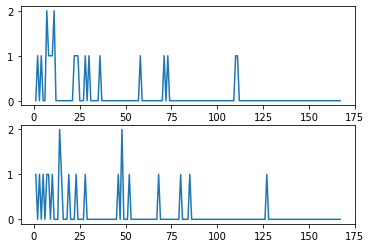

In [17]:
x_axis = np.arange(NUM_TASKS)+1 # the x axis
y_train_gt_axis = np.zeros(NUM_TASKS) # the ground truth train axis
y_val_gt_axis = np.zeros(NUM_TASKS) # the groud truth validation axis 
y_train_predict_axis = np.zeros(NUM_TASKS) # the predict train axis 
y_val_predict_axis = np.zeros(NUM_TASKS) # the predict validation axis 

for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
    y_val_gt_axis[i] = np.sum(survival_times[NUM_TRAIN:] == x_axis[i])
    y_train_predict_axis[i] = np.sum(predict_age[:NUM_TRAIN] == x_axis[i])
    y_val_predict_axis[i] = np.sum(predict_age[NUM_TRAIN:] == x_axis[i])
# plt.plot(x_axis, y_train_gt_axis, x_axis, y_train_predict_axis) # the training set: ground truth vs predict situation
# plt.plot(x_axis, y_val_gt_axis, x_axis, y_val_predict_axis) # the valiadtion set: ground truth vs predictsituation
plt.subplot(211)
plt.plot(x_axis, y_val_gt_axis)
plt.subplot(212)
plt.plot(x_axis, y_val_predict_axis)
# plt.plot(x_axis,y_train_predict_axis,y_val_predict_axis)

In [18]:
Yhat_tr = Kernel_Matrix_Train.dot(alpha * Y_train)
good = 0
mzz =[]
for i in range(NUM_TRAIN):
    num_violates_ranking_constraints = np.sum(Yhat_tr[i, int(survival_times[i]): ] > 0)
    predict_gap = survival_times[i] - predict_age[i]
    # print(num_violates_ranking_constraints)
    if num_violates_ranking_constraints == 0:
        good += 1
    else:
        mzz.append(np.sign(num_violates_ranking_constraints * predict_gap))
        # mzz.append((num_violates_ranking_constraints, predict_gap))
print(good)
print(NUM_TRAIN)

179
180


In [19]:
print(np.sum(np.array(mzz) < 0))
print(np.array(mzz).size)

1
1


In [20]:
for i in range(len(IDs)):
    idx_last_1 = np.where(haty_IDs[i] == 1)[0][-1] # find the last 1
    idx_minus1_list = np.where(haty_IDs[i][:idx_last_1] == -1)[0] # find all -1 before the last 1
    idx_last_minus1 = idx_minus1_list[-1]
    idx_1_list = np.where(haty_IDs[i][idx_last_minus1:idx_last_1] == 1)[0]

NameError: name 'IDs' is not defined

In [ ]:
c = np.array([1,2,3,4])
print(np.tile(c,(4,1)).T)